In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## LSTM

Long short term memory, LSTM -  представляет собой систему глубинного обучения, при реализации которой удалось обойти проблему исчезновения или взрыва градиентов в процессе обучения методом обратного распространения ошибки. 

Сеть LSTM обычно модерируется с помощью рекуррентных вентилей, которые называются вентили (gates) «забывания».

Ошибки распространяются назад по времени через потенциально неограниченное количество виртуальных слоёв. 

Таким образом происходит обучение в LSTM, при этом сохраняя память о временных интервалах в прошлого



https://github.com/nicodjimenez/lstm

Визуализация работы LSTM http://datareview.info/article/issleduem-lstm-seti-chast-2/

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, LSTM, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
import numpy as np
from PIL import Image
import tensorflow as tf

In [4]:
xLen=10 ## длина истории
n=5   ## длина вектора данных

In [5]:
x = Input(shape=(xLen,n,))
y= LSTM(32,return_sequences=False )(x)


model = Model(x,y)
model.compile(loss='mse',optimizer='Adam',metrics=['mse'])

In [6]:
y

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'lstm')>

In [7]:
x

<KerasTensor: shape=(None, 10, 5) dtype=float32 (created by layer 'input_1')>

In [8]:
xx = np.random.randn(1,xLen,n)

y.shape,xx.shape 


(TensorShape([None, 32]), (1, 10, 5))

In [9]:
yy = model.predict(xx)

In [10]:
yy.shape

(1, 32)

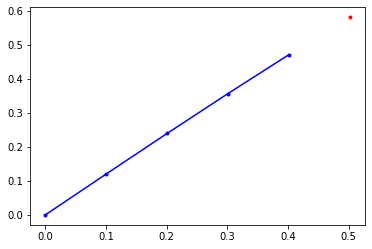

((294, 1), (294, 5, 2))

In [39]:
N=300
t= np.linspace(0,30,N).reshape((N,1))
x = np.sin(t) + t*0.2
n=2
xLen=5


plt.plot(t[0:xLen],x[0:xLen],'.-b')


h=1  # горизонт прогноза
xx=[]
y=[]
for i in range(N-xLen - h):
  xx.append(np.concatenate( (t[i:xLen+i],x[i:xLen+i])).reshape((xLen,2)))
  y.append(x[i+h+xLen-1])
xx = np.array(xx)  
y = np.array(y)

plt.plot(t[xLen+h-1],y[0],'.r')
plt.show()
y.shape,xx.shape 

In [40]:
x_in = Input(shape=(xLen,n,))
y_out= LSTM(32,return_sequences=False )(x_in)
y_out = Dense(1,activation='linear')(y_out)


model = Model(x_in,y_out)
model.compile(loss='mse',optimizer='Adam',metrics=['mse'])

In [41]:
test_n = 200
model.fit(xx[:test_n,:,:],y[:test_n], epochs=20)

Epoch 1/20
7/7 [==============================] - 1s 4ms/step - loss: 5.1856 - mse: 5.1856
Epoch 2/20
7/7 [==============================] - 0s 3ms/step - loss: 3.8880 - mse: 3.8880
Epoch 3/20
7/7 [==============================] - 0s 3ms/step - loss: 3.1003 - mse: 3.1003
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: 1.9518 - mse: 1.9518
Epoch 5/20
7/7 [==============================] - 0s 3ms/step - loss: 1.3692 - mse: 1.3692
Epoch 6/20
7/7 [==============================] - 0s 3ms/step - loss: 1.0697 - mse: 1.0697
Epoch 7/20
7/7 [==============================] - 0s 4ms/step - loss: 0.9740 - mse: 0.9740
Epoch 8/20
7/7 [==============================] - 0s 3ms/step - loss: 0.7831 - mse: 0.7831
Epoch 9/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6320 - mse: 0.6320
Epoch 10/20
7/7 [==============================] - 0s 4ms/step - loss: 0.4989 - mse: 0.4989
Epoch 11/20
7/7 [==============================] - 0s 4ms/step - loss: 0.5245 - mse: 0.52

In [42]:
ypred = model.predict(xx[test_n:,:,:])


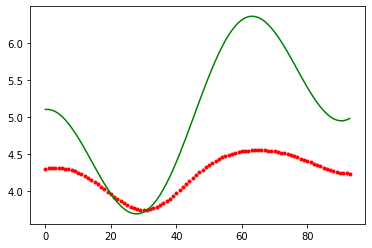

In [43]:
plt.plot(ypred,'.r')
plt.plot(y[test_n:],'g')
plt.show()

In [ ]:
yy

array([[ 0.15299363,  0.29349163, -0.30122775,  0.07652692,  0.2806155 ,
        -0.12526397,  0.74046576,  0.33210793,  0.01929759,  0.87495536,
        -0.03370479, -0.11093336, -0.02806146, -0.45402318, -0.24420857,
        -0.08618777,  0.69457954,  0.83475393,  0.14761725,  0.70372754,
         0.2186755 , -0.08139043,  0.12259027, -0.5134373 , -0.3402254 ,
         0.2979614 , -0.38893387,  0.24882084,  0.44970256,  0.6235666 ,
        -0.14804779, -0.14710696]], dtype=float32)